# Proyecto: Predicción del Rendimiento Académico de Estudiantes

--- 

## Objetivo del Proyecto

Desarrollar un modelo predictivo que estime las notas finales de los estudiantes utilizando datos como horas de estudio, asistencia y participación en clase. Aplicaremos técnicas de ciencia de datos para analizar el "Student Performance Dataset" y utilizaremos modelos de regresión lineal y árboles de decisión.

https://archive.ics.uci.edu/dataset/320/student+performance

## índice

1. [Introducción](#Introducción)
2. [Información del conjunto de datos](#Información-del-conjunto-de-datos)
3. [Importación de Bibliotecas y Carga de Datos](#Importación-de-Bibliotecas-y-Carga-de-Datos)
4. [Preparación y Combinación de los Datos](#Preparación-y-Combinación-de-los-Datos)
5. [Análisis Exploratorio de Datos](#Análisis-Exploratorio-de-Datos-(EDA))
6. [Preprocesamiento de Datos](#Preprocesamiento-de-Datos)
7. [Análisis Comparativo entre Matemáticas y Portugués](#Análisis-Comparativo-entre-Matemáticas-y-Portugués)
8. [Modelado y Evaluación](#Modelado-y-Evaluación)
9. [Conclusión](#Conclusión)


# Introducción
El rendimiento académico de los estudiantes es un área de interés clave en el ámbito educativo. Comprender los factores que influyen en las calificaciones finales puede ayudar a educadores y administradores a implementar estrategias efectivas para mejorar el aprendizaje. En este análisis, examinaremos el rendimiento en las asignaturas de Matemáticas y Portugués, identificando similitudes y diferencias en los factores que afectan el desempeño en cada una.

# Información del conjunto de datos

Este estudio analiza el rendimiento de los estudiantes en la educación secundaria de dos escuelas portuguesas. Los atributos de los datos incluyen calificaciones de los estudiantes, características demográficas, sociales y relacionadas con la escuela) y se recopilaron mediante informes escolares y cuestionarios. Se proporcionan dos conjuntos de datos sobre el rendimiento en dos materias distintas: matemáticas (mat) y lengua portuguesa (por).


| Variable Name | Role    | Type         | Description                                                                                  |
|---------------|---------|--------------|----------------------------------------------------------------------------------------------|
| school        | Feature | Categorical  | Escuela del estudiante (binario: 'GP' - Gabriel Pereira o 'MS' - Mousinho da Silveira)             |
| sex           | Feature | Binary       | Sexo del estudiante (binario: 'F' - femenino o 'M' - masculino)                                           |
| age           | Feature | Integer      | Edad del estudiante (numérico: de 15 a 22)                                                       |
| address       | Feature | Categorical  | Tipo de dirección de la vivienda del estudiante (binario: 'U' - urbana o 'R' - rural)                             |
| famsize       | Feature | Categorical  | Tamaño de la familia (binario: 'LE3' - menor o igual a 3 o 'GT3' - mayor que 3)                   |
| Pstatus       | Feature | Categorical  | Estado de convivencia de los padres (binario: 'T' - juntos o 'A' - separados)                  |
| Medu          | Feature | Integer      | Nivel educativo de la madre (numérico: 0 - ninguno, 1 - primaria, 2 - secundaria, etc.) |
| Fedu          | Feature | Integer      | Nivel educativo del padre (numérico: 0 - ninguno, 1 - primaria, 2 - secundaria, etc.) |
| Mjob          | Feature | Categorical  | Ocupación de la madre (nominal: 'teacher', 'health', 'services', 'at_home' u 'other')                |
| Fjob          | Feature | Categorical  | Ocupación del padre (nominal: 'teacher', 'health', 'services', 'at_home' u 'other')                |
| reason        | Feature | Categorical  | Razón para elegir esta escuela (nominal: cerca de 'home', 'reputation', etc.)                  |
| guardian      | Feature | Categorical  | Tutor del estudiante (nominal: 'mother', 'father' u 'other')                                  |
| traveltime    | Feature | Integer      | Tiempo de viaje de casa a la escuela (numérico: 1 - <15 min, 2 - 15 a 30 min, etc.)                    |
| studytime     | Feature | Integer      | Tiempo semanal de estudio (numérico: 1 - <2 horas, 2 - 2 a 5 horas, etc.)                            |
| failures      | Feature | Integer      | Número de clases reprobadas anteriormente (numérico: n si 1<=n<3, de lo contrario 4)                                 |
| schoolsup     | Feature | Binary       | Apoyo educativo adicional (binario: sí o no)                                                |
| famsup        | Feature | Binary       | Apoyo educativo familiar (binario: sí o no)                                               |
| paid          | Feature | Binary       | Clases particulares (binario: sí o no)                                                       |
| activities    | Feature | Binary       | Actividades extracurriculares (binario: sí o no)                                              |
| nursery       | Feature | Binary       | Asistió a guardería (binario: sí o no)                                                  |
| higher        | Feature | Binary       | Desea continuar con estudios superiores (binario: sí o no)                                           |
| internet      | Feature | Binary       | 	Acceso a Internet en casa (binario: sí o no)                                                  |
| romantic      | Feature | Binary       | Tiene una relación sentimental (binario: sí o no)                                             |
| famrel        | Feature | Integer      | Calidad de las relaciones familiares (numérico: 1 - muy mala a 5 - excelente)                     |
| freetime      | Feature | Integer      | Tiempo libre después de la escuela (numérico: 1 - muy bajo a 5 - muy alto)                              |
| goout         | Feature | Integer      | Frecuencia de salir con amigos (numérico: 1 - muy baja a 5 - muy alta)                              |
| Dalc          | Feature | Integer      | Consumo de alcohol entre semana (numérico: 1 - muy bajo a 5 - muy alto)                         |
| Walc          | Feature | Integer      | Consumo de alcohol durante el fin de semana (numérico: 1 - muy bajo a 5 - muy alto)                         |
| health        | Feature | Integer      | Estado de salud actual (numérico: 1 - muy malo a 5 - muy bueno)                               |
| absences      | Feature | Integer      | Número de ausencias escolares (numérico: de 0 a 93)                                            |
| G1            | Target  | Categorical  | Calificación del primer periodo (numérico: de 0 a 20)                                                   |
| G2            | Target  | Categorical  | Calificación del segundo periodo (numérico: de 0 a 20)                                                  |
| G3            | Target  | Integer      | Calificación final (numérico: de 0 a 20, variable objetivo)                                          |




In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn jupyter xgboost

You should consider upgrading via the 'c:\Users\juanjo\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


# Importación de Bibliotecas y Carga de Datos

---


Importamos las librerías necesarias para el análisis y cargamos los conjuntos de datos correspondientes a Matemáticas y Portugués.

In [2]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones de visualización
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

# Ignorar advertencias
import warnings
warnings.filterwarnings('ignore')

## Carga de datos

In [3]:
# Cargar los conjuntos de datos
data_mat = pd.read_csv('../data/student-mat.csv', sep=';')
data_por = pd.read_csv('../data/student-por.csv', sep=';')

## ***Descripción de los Datos:***

- Ambos conjuntos de datos contienen información sobre estudiantes de secundaria en Portugal.
- Las variables incluyen datos demográficos, sociales y académicos.
- Las calificaciones (`G1`, `G2`, `G3`) representan las notas de los tres periodos evaluativos.

# Preparación y Combinación de los Datos

---


## 4.1. Verificación de las Dimensiones
Verificamos el tamaño de cada conjunto de datos para entender la cantidad de registros que tenemos.

In [4]:
print(f"Datos de Matemáticas: {data_mat.shape}")
print(f"Datos de Portugués: {data_por.shape}")

Datos de Matemáticas: (395, 33)
Datos de Portugués: (649, 33)


#### ***Interpretación:***

- Tenemos 395 registros de estudiantes en Matemáticas y 649 en Portugués.
- Ambos conjuntos de datos tienen 33 columnas, lo que sugiere que contienen las mismas variables.

## 4.2. Inspección de las Variables
Verificamos que las columnas sean las mismas en ambos conjuntos de datos.

In [5]:
columns_mat = set(data_mat.columns)
columns_por = set(data_por.columns)

print(f"Diferencias en columnas: {columns_mat.symmetric_difference(columns_por)}")

Diferencias en columnas: set()


#### ***Interpretación:***

No hay diferencias en las columnas; ambos conjuntos de datos tienen las mismas variables.

## 4.3. Añadir una Variable Indicadora de la Asignatura
Agregamos una columna que identifica la asignatura para cada registro.

In [6]:
data_mat['subject'] = 'Math'
data_por['subject'] = 'Portuguese'

## 4.4. Combinar los Conjuntos de Datos
Unimos los dos conjuntos de datos en uno solo para facilitar el análisis comparativo.

In [7]:
data_combined = pd.concat([data_mat, data_por], ignore_index=True)

#### Verificación de la Combinación

In [8]:
print(f"Datos combinados: {data_combined.shape}")

Datos combinados: (1044, 34)


#### ***Interpretación:***

- Ahora tenemos un conjunto de datos con 1044 registros y 34 columnas (incluyendo la nueva columna `subject`).

# Análisis Exploratorio de Datos


---

## 5.1. Descripción General
Inspeccionamos los primeros registros y obtenemos información general del conjunto de datos combinado.

In [9]:
# Mostrar las primeras filas
print(data_combined.head())

# Información general
print(data_combined.info())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  freetime goout  Dalc  Walc  health absences  G1  G2  G3 subject  
0        3     4     1     1       3        6   5   6   6    Math  
1        3     3     1     1       3        4   5   5   6    Math  
2        3     2     2     3       3       10   7   8  10    Math  
3        2     2     1     1       5        2  15  14  15    Math  
4        3     2     1     2       5        4   6  10  10    Math  

[5 rows x 34 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data col

#### ***Observaciones:***

- Las variables incluyen información sobre sexo, edad, situación familiar, apoyo educativo, tiempo de estudio, ausencias, y calificaciones.
- No hay valores nulos en el conjunto de datos, lo que facilita el análisis.

## 5.2. Análisis Univariante


### 5.2.1 Variables Numéricas
Examinamos la distribución de las variables numéricas.

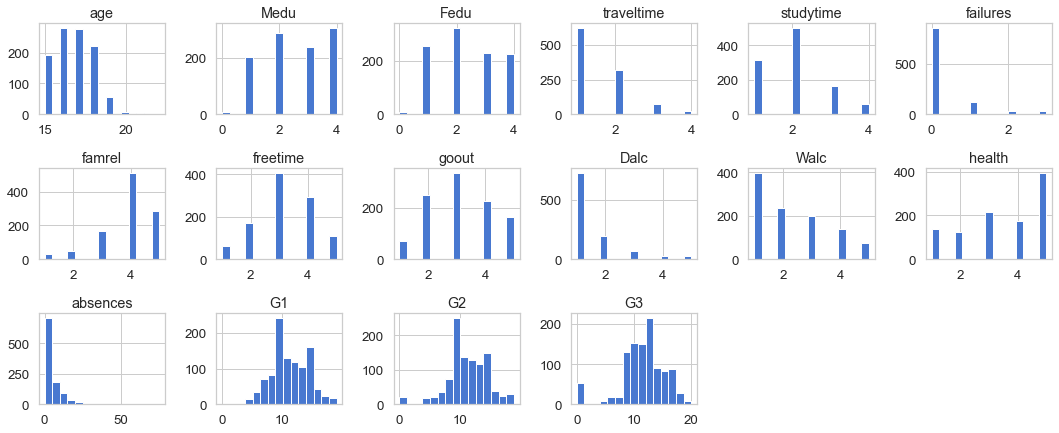

In [10]:
# Variables numéricas
numeric_vars = data_combined.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Histograma de variables numéricas
data_combined[numeric_vars].hist(bins=15, figsize=(15, 12), layout=(6, 6))
plt.tight_layout()
plt.show()

#### ***Interpretación:***

- Edad (`age`): La mayoría de los estudiantes tienen entre ***15*** y ***18*** años.
- Ausencias (`absences`): Distribución sesgada a la derecha, con algunos estudiantes con muchas ausencias.
- Calificaciones (`G1`, `G2`, `G3`): Distribuciones diferentes en cada asignatura; es necesario analizar por separado.

### 5.2.2. Variables Categóricas
Examinamos la frecuencia de las categorías en las variables categóricas.

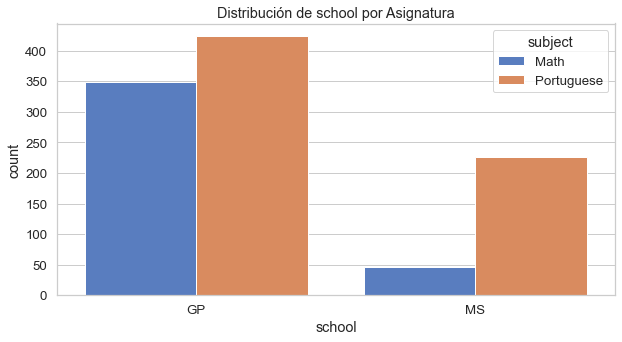

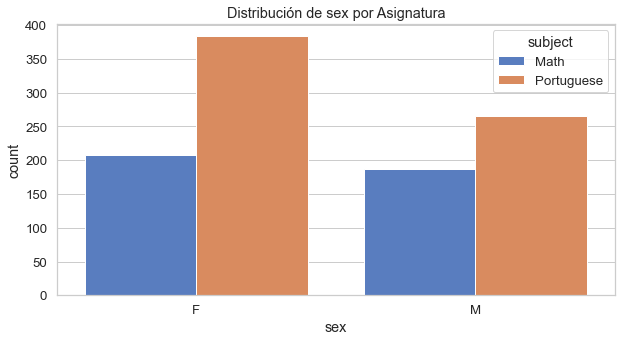

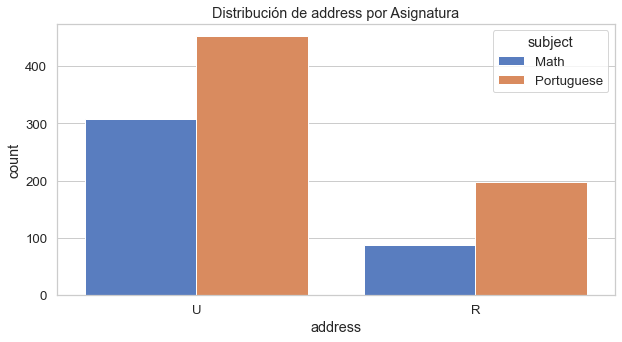

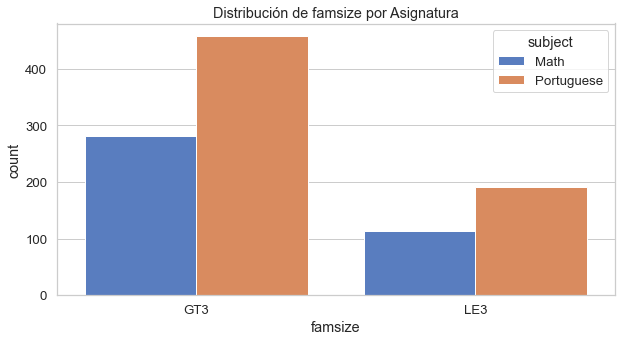

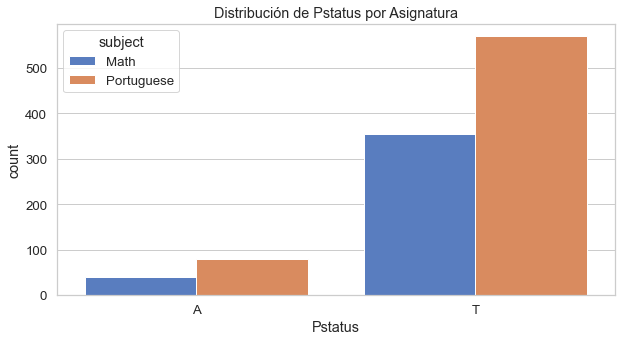

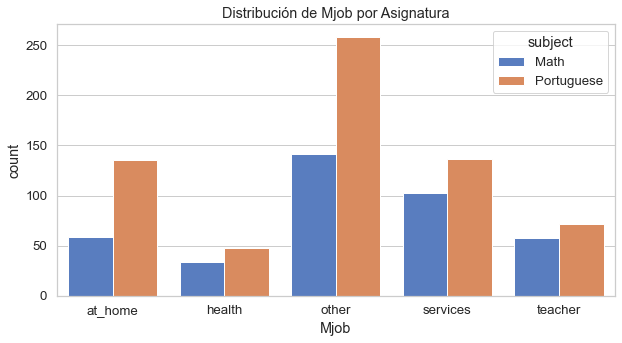

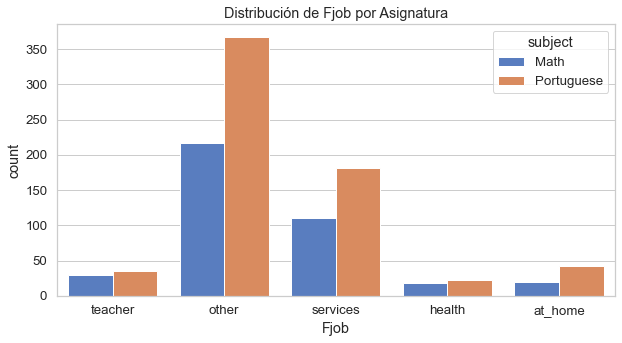

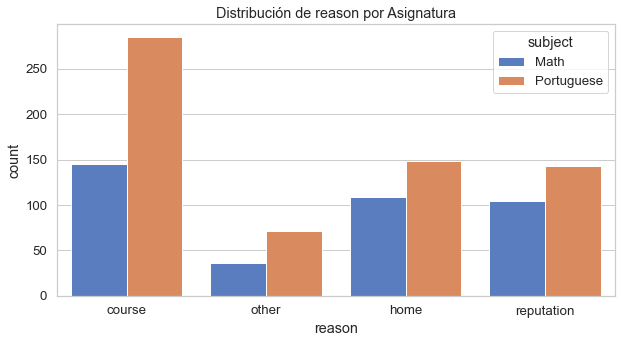

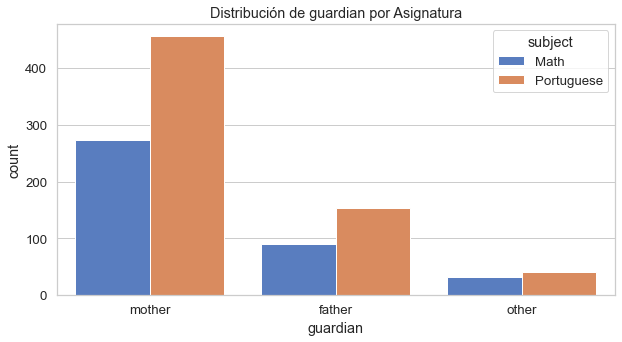

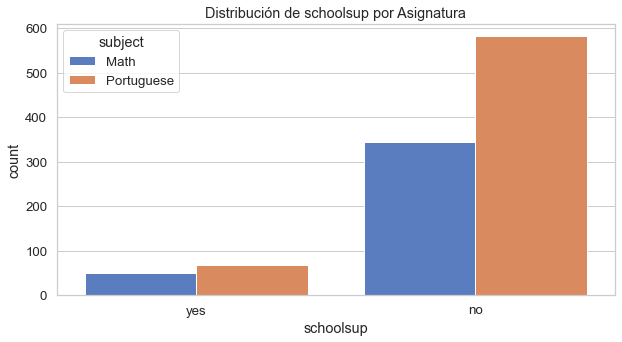

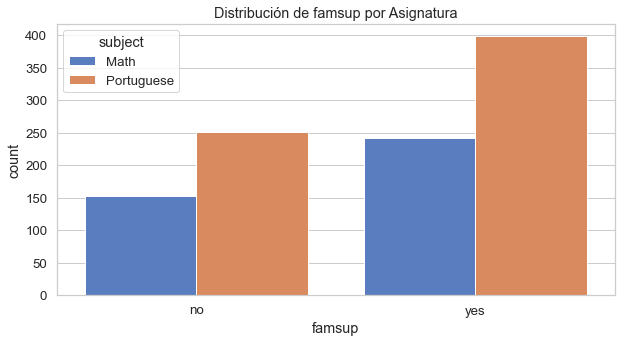

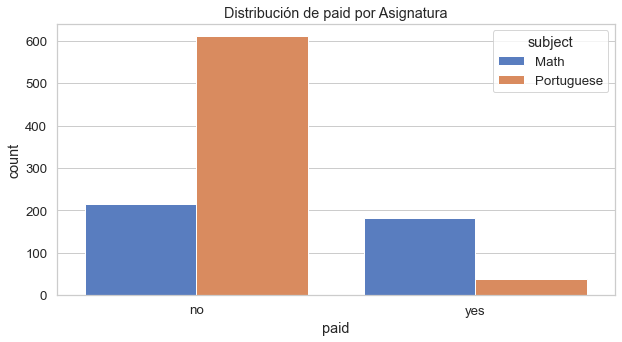

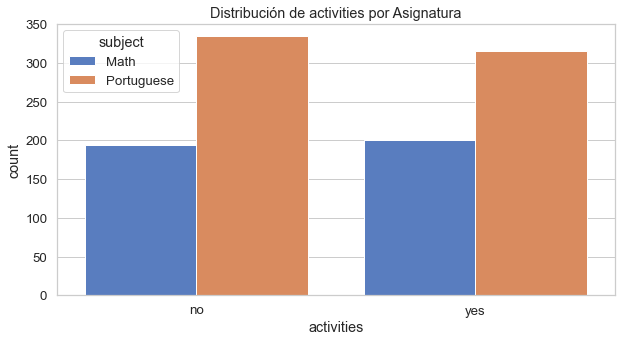

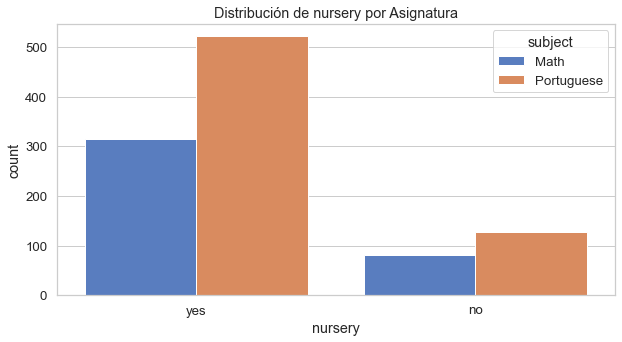

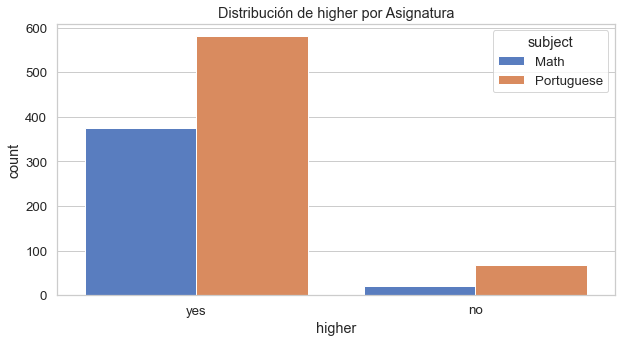

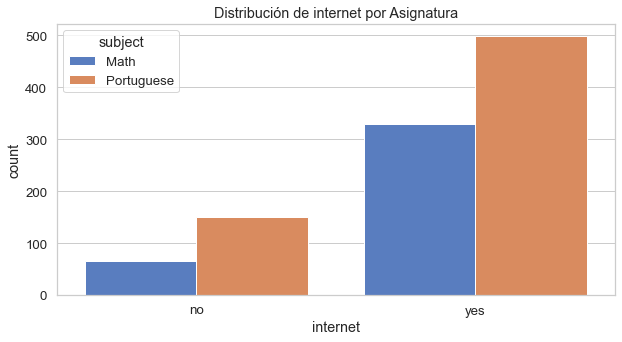

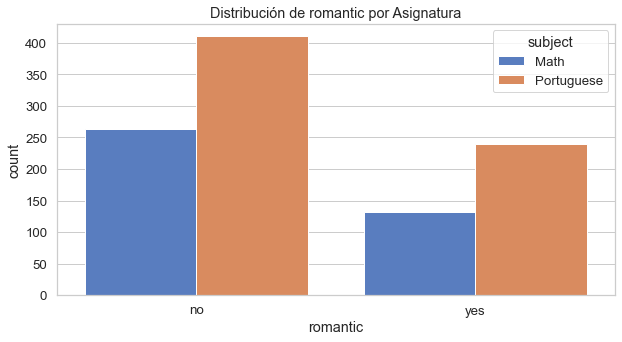

In [11]:
# Variables categóricas
categorical_vars = data_combined.select_dtypes(include=['object']).columns.tolist()
categorical_vars.remove('subject')  # Excluimos 'subject' por ahora

for var in categorical_vars:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data_combined, x=var, hue='subject')
    plt.title(f"Distribución de {var} por Asignatura")
    plt.show()

## 5.3. Análisis Bivariante


### 5.3.1. Distribución de `G3` por Asignatura

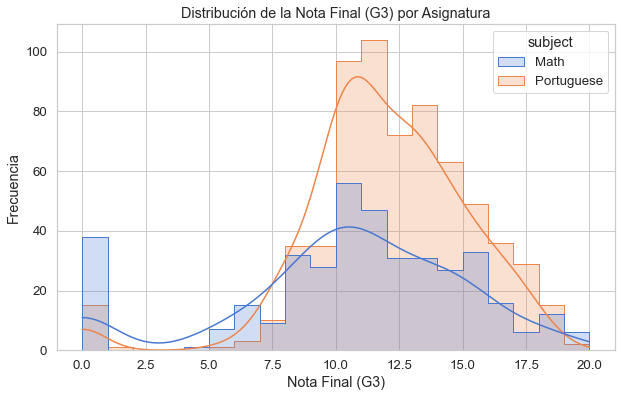

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data_combined, x='G3', hue='subject', kde=True, bins=20, element='step')
plt.title('Distribución de la Nota Final (G3) por Asignatura')
plt.xlabel('Nota Final (G3)')
plt.ylabel('Frecuencia')
plt.show()

#### ***Interpretación:***

- **Matemáticas:** Distribución más sesgada hacia notas bajas; mayor concentración de estudiantes con notas entre 0 y 10.
- **Portugués:** Distribución más uniforme; mayor cantidad de estudiantes con notas altas (entre 12 y 18).

#### ***Conclusión:***

Los estudiantes parecen obtener mejores calificaciones en Portugués que en Matemáticas. Se infiere que la generación de la concentración de notas entre 0 y 10 se debe a los resultados de `G1` y `G2`. Podemos observar en el [análisis univariables de las variables numéricas](#5.2.1-Variables-Numéricas) que en `G1` no hay concentración de notas entre 0 y 10, en `G2` se observa una pequeña concentración en este intervalo y en `G3` se observa una concentración más marcada. Más adelante se comprobará la correlación entre estas variables.

# Preprocesamiento de Datos

---



## 6.1. Codificación de Variables Categóricas


### 6.1.1. Variables Binarias
Identificamos y codificamos las variables categóricas binarias.

In [13]:
binary_vars = ['sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup',
               'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

binary_mapping = {
    'F': 0, 'M': 1,
    'U': 1, 'R': 0,
    'LE3': 0, 'GT3': 1,
    'A': 0, 'T': 1,
    'yes': 1, 'no': 0
}

for var in binary_vars:
    data_combined[var] = data_combined[var].map(binary_mapping)

#### ***Verificación:***

In [14]:
# Comprobar si quedan valores nulos después del mapeo
print("Valores nulos después del mapeo:", data_combined[binary_vars].isnull().sum().sum())

Valores nulos después del mapeo: 0


***El mapeo fue exitoso; no hay valores nulos en estas variables.***

### 6.1.2. Variables con Múltiples Categorías
Codificamos las variables categóricas con más de dos categorías utilizando One-Hot Encoding.

In [15]:
multi_cat_vars = ['school', 'Mjob', 'Fjob', 'reason', 'guardian']

data_combined = pd.get_dummies(data_combined, columns=multi_cat_vars, drop_first=True)

#### ***Verificación:***

In [16]:
# Verificar que no queden variables de tipo 'object'
print("Variables de tipo 'object' restantes:", data_combined.select_dtypes(include=['object']).columns.tolist())

Variables de tipo 'object' restantes: ['subject']


***Solo queda la variable `subject`, que indicará la asignatura.***

### 6.1.3. Codificación de la Variable 'subject'
Convertimos `subject` en una variable binaria: 0 para Matemáticas y 1 para Portugués.

In [17]:
# Verificar los valores únicos en la columna 'subject'
print("Valores únicos en 'subject':", data_combined['subject'].unique())

Valores únicos en 'subject': ['Math' 'Portuguese']


## 6.2. Manejo de Valores Atípicos


### 6.2.1. Análisis de absences
Examinamos la distribución de las ausencias.

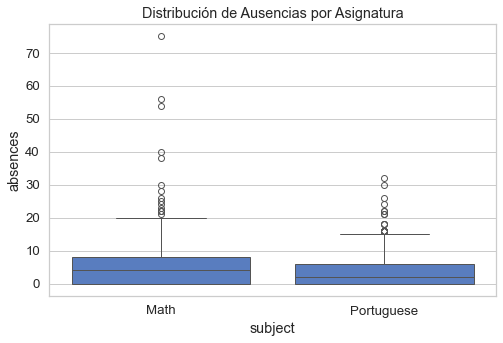

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='subject', y='absences', data=data_combined)
plt.title('Distribución de Ausencias por Asignatura')
plt.show()

***Valores Atípicos:*** Observamos valores atípicos en ambas asignaturas, con algunos estudiantes registrando ausencias muy altas.

### 6.2.2. Limitación de valores atípicos
Limitamos las ausencias al percentil 90 para reducir el efecto de los valores extremos.

In [19]:
absences_95 = data_combined['absences'].quantile(0.90)
data_combined['absences'] = np.where(data_combined['absences'] > absences_95, absences_95, data_combined['absences'])

#### ***Verificación:***

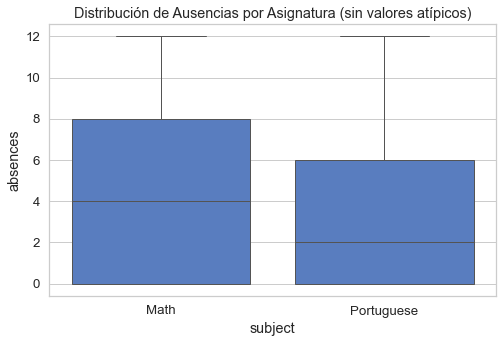

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='subject', y='absences', data=data_combined)
plt.title('Distribución de Ausencias por Asignatura (sin valores atípicos)')
plt.show()

***La distribución es ahora más uniforme y los valores atípicos han sido mitigados.***

# 6.3. Procesamiento usando PySpark

---



Implementamos el preprocesamiento utilizando PySpark para manejar el conjunto de datos de manera eficiente y comparar tiempos.

In [21]:
pip install pyspark


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\juanjo\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [22]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import when

In [23]:
# Crear una sesión de PySpark
spark = SparkSession.builder.master("local[*]").appName("StudentPerformance").getOrCreate() #Se inicializa una sesión de Spark en modo local, asignándole el nombre "StudentPerformance", 
#para poder procesar datos distribuidos en un entorno local.

In [24]:
# Convertir datos a un DataFrame de PySpark
data_spark = spark.createDataFrame(data_combined)

In [25]:
# Codificación de variables binarias
for var in binary_vars:
    data_spark = data_spark.withColumn(var, when(data_spark[var] == 1, 1).otherwise(0))
# Iteramos sobre una lista de variables (binary_vars) y convierte cada una de estas columnas en una columna binaria (0 o 1)
# en un DataFrame de Spark


In [26]:
# Mostrar el esquema para verificar
data_spark.printSchema()

root
 |-- sex: integer (nullable = false)
 |-- age: long (nullable = true)
 |-- address: integer (nullable = false)
 |-- famsize: integer (nullable = false)
 |-- Pstatus: integer (nullable = false)
 |-- Medu: long (nullable = true)
 |-- Fedu: long (nullable = true)
 |-- traveltime: long (nullable = true)
 |-- studytime: long (nullable = true)
 |-- failures: long (nullable = true)
 |-- schoolsup: integer (nullable = false)
 |-- famsup: integer (nullable = false)
 |-- paid: integer (nullable = false)
 |-- activities: integer (nullable = false)
 |-- nursery: integer (nullable = false)
 |-- higher: integer (nullable = false)
 |-- internet: integer (nullable = false)
 |-- romantic: integer (nullable = false)
 |-- famrel: long (nullable = true)
 |-- freetime: long (nullable = true)
 |-- goout: long (nullable = true)
 |-- Dalc: long (nullable = true)
 |-- Walc: long (nullable = true)
 |-- health: long (nullable = true)
 |-- absences: double (nullable = true)
 |-- G1: long (nullable = true)
 |

# 6.4. Comparación de Tiempos de Procesamiento

---



Comparamos los tiempos entre Pandas y PySpark para el manejo del conjunto de datos.


In [27]:
import time

# Medir tiempo con Pandas
start_pandas = time.time()
data_combined['absences'] = np.where(data_combined['absences'] > absences_95, absences_95, data_combined['absences'])
end_pandas = time.time()  # consiste en identificar y reemplazar valores atípicos en la columna 'absences' 
#de un conjunto de datos. La función np.where de NumPy para realizar esta tarea de manera eficiente. 
#Los tiempos de inicio y fin se registran con time.time para calcular la duración total de la operación.

In [28]:
# Medir tiempo con PySpark
start_spark = time.time()
data_spark = data_spark.withColumn("absences", when(data_spark["absences"] > absences_95, absences_95).otherwise(data_spark["absences"]))
end_spark = time.time() #mide el tiempo de ejecución de una operación en Spark que identifica y reemplaza los valores atípicos en la columna 
#"absences" de un DataFrame.


In [29]:
# Comparar resultados
print(f"Tiempo de Pandas: {end_pandas - start_pandas:.4f} segundos")
print(f"Tiempo de PySpark: {end_spark - start_spark:.4f} segundos")
#  Se imprimen el tiempo de ejecución, en segundos, de las dos operaciones distintas

Tiempo de Pandas: 0.0020 segundos
Tiempo de PySpark: 0.0984 segundos


# Análisis Comparativo entre Matemáticas y Portugués

---



## 7.1. Matriz de Correlación por Asignatura


### 7.1.1. Matemáticas

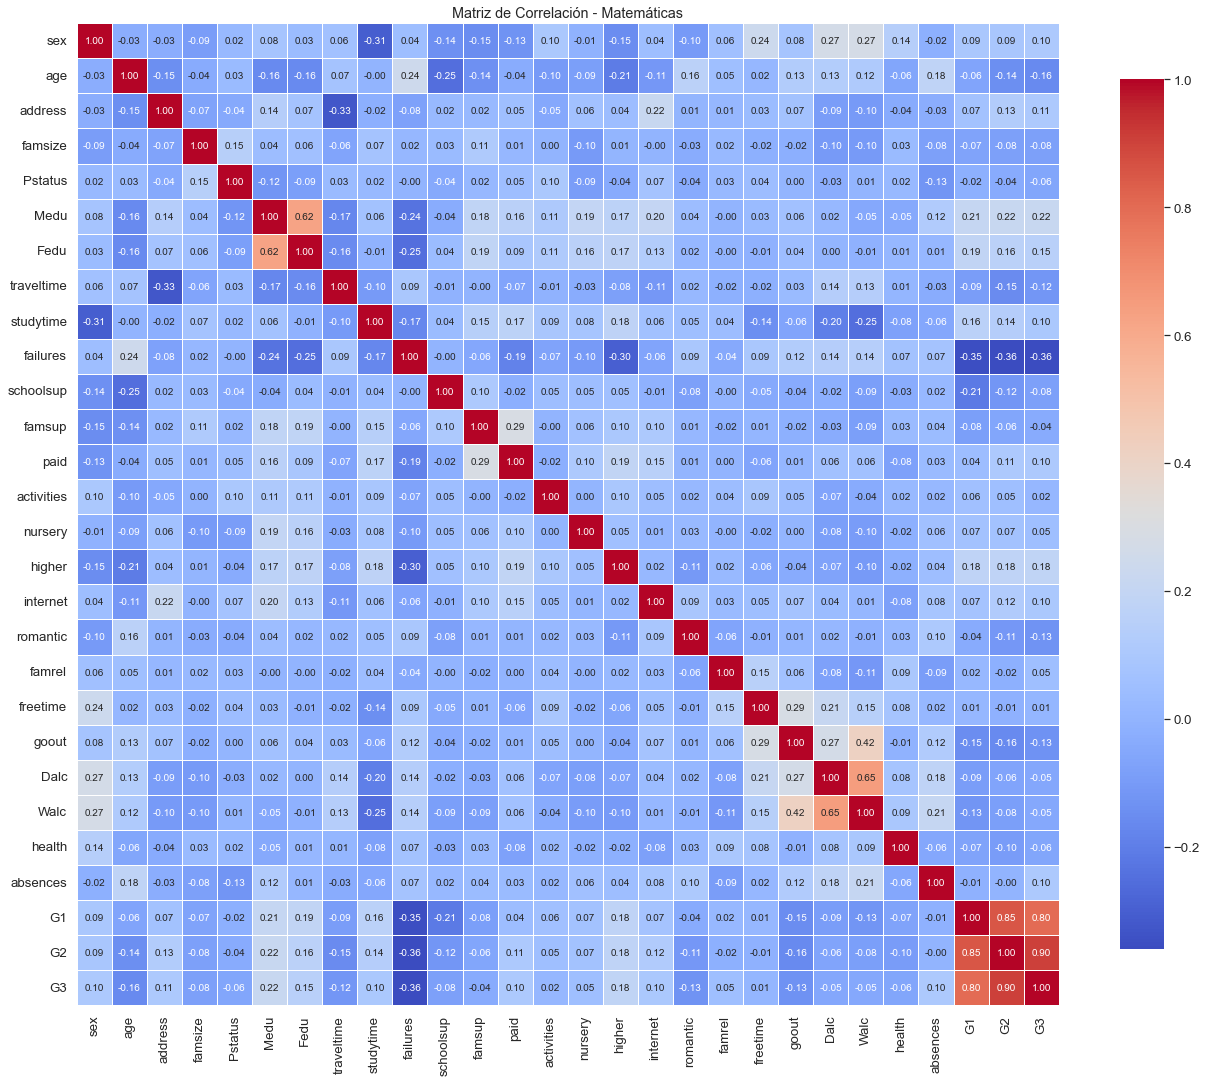

In [30]:
data_math = data_combined[data_combined['subject'] == 'Math']
data_math = data_math.drop(columns=['subject', 'school_MS', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_other', 'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother', 'guardian_other', 'Fjob_health','Fjob_services'])
corr_matrix_math = data_math.corr()

plt.figure(figsize=(22, 20))
sns.heatmap(
    corr_matrix_math,
    annot=True,
    fmt='.2f',
    annot_kws={"size": 10},
    cmap='coolwarm',
    cbar_kws={'shrink': 0.8},
    linewidths=0.5,
    linecolor='white',
    square=True
)
plt.title('Matriz de Correlación - Matemáticas')
plt.show()

#### ***Altas Correlaciones:***
- `G1` y `G3` : ***0.8***
- `G2` y `G3` : ***0.9***

#### ***Variables con Correlación Negativa***
- `failures` y `G3` : ***-0.36***

### 7.1.2. Portugués

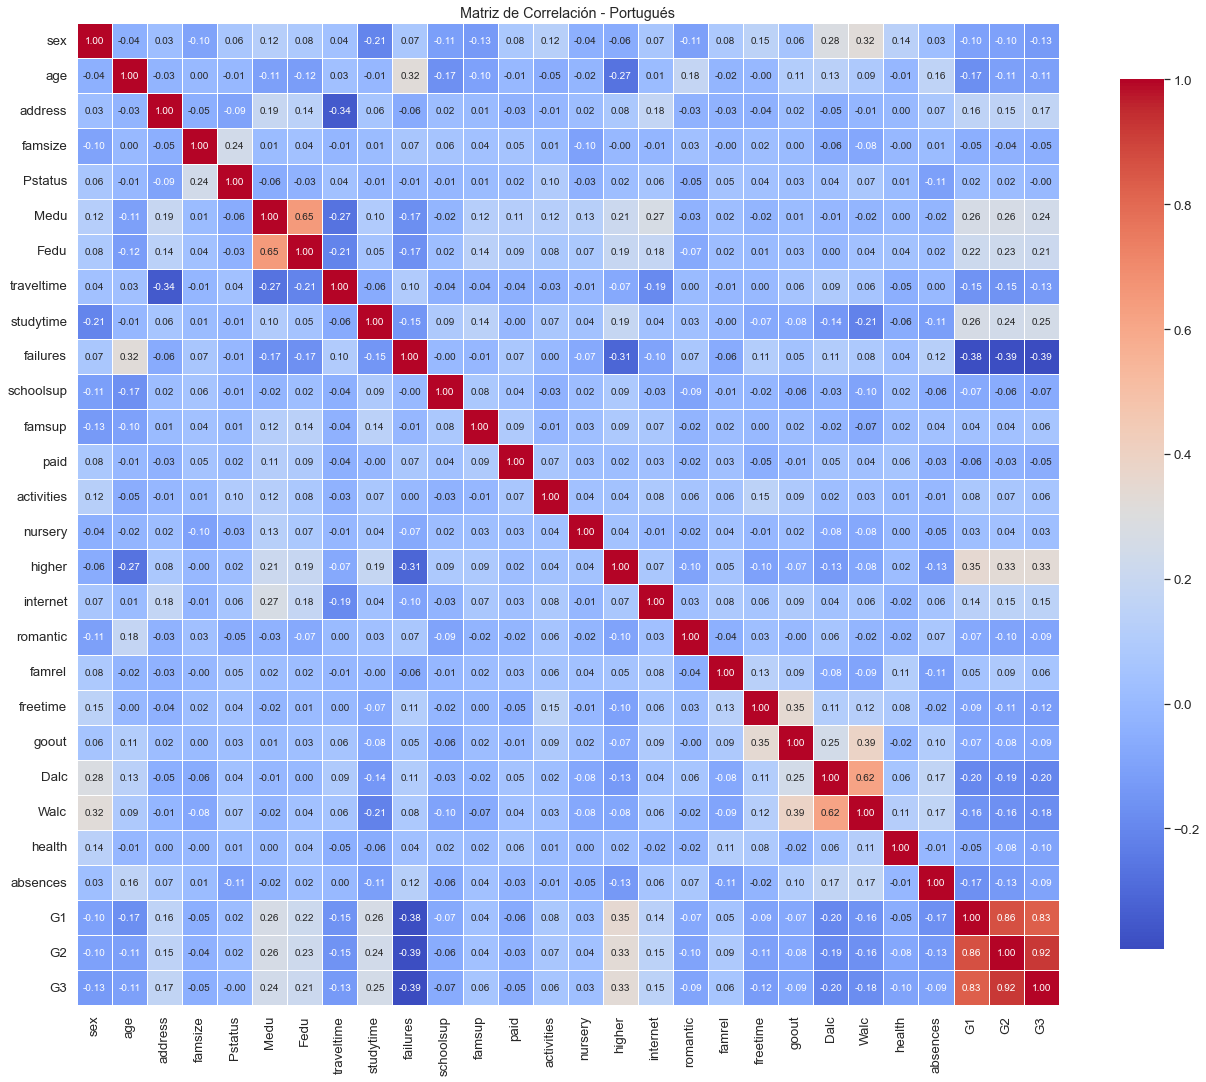

In [31]:
data_math = data_combined[data_combined['subject'] == 'Portuguese']
data_math = data_math.drop(columns=['subject', 'school_MS', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_other', 'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother', 'guardian_other', 'Fjob_health','Fjob_services'])
corr_matrix_math = data_math.corr()

plt.figure(figsize=(22, 20))
sns.heatmap(
    corr_matrix_math,
    annot=True,
    fmt='.2f',
    annot_kws={"size": 10},
    cmap='coolwarm',
    cbar_kws={'shrink': 0.8},
    linewidths=0.5,
    linecolor='white',
    square=True
)
plt.title('Matriz de Correlación - Portugués')
plt.show()

#### ***Altas Correlaciones:***
- `G1` y `G3` : ***0.83***
- `G2` y `G3` : ***0.92***

#### ***Variables con Correlación Negativa***
- `failures` y `G3` : ***-0.39***

#### Comparación:

- En ambas asignaturas, las calificaciones previas (`G1`, `G2`) son fuertes predictores de `G3`.
- La influencia de `studytime` es ligeramente mayor en Portugués.

## 7.2. Análisis de Variables Claves
En esta sección, profundizaremos en las variables clave que pueden influir en el rendimiento académico de los estudiantes en las asignaturas de Matemáticas y Portugués. Analizaremos cómo estas variables afectan la nota final (`G3`) y si su impacto difiere entre las dos asignaturas.

***Variables a Analizar:***

- `failures`: Número de fracasos académicos previos.
- `studytime`: Tiempo semanal dedicado al estudio.
- `absences`: Número de ausencias escolares.
- `age`: Edad del estudiante.
- `sex`: Sexo del estudiante.
- `higher`: Deseo de cursar educación superior.
- `internet`: Acceso a internet en el hogar.
- `goout`: Frecuencia de salir con amigos.
- `health`: Estado de salud actual.
- `famrel`: Calidad de las relaciones familiares.



### 7.2.1. Fracasos Académicos (`failures`)
El número de fracasos académicos previos puede ser un indicador significativo del rendimiento futuro.

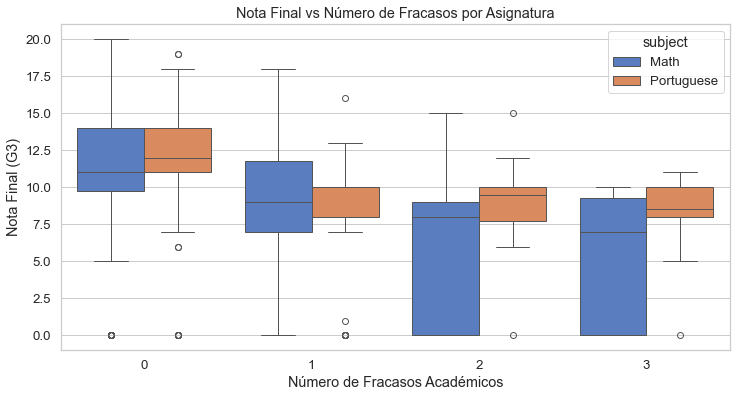

In [32]:
# Gráfico de caja para 'failures' vs 'G3' por asignatura
plt.figure(figsize=(12, 6))
sns.boxplot(x='failures', y='G3', hue='subject', data=data_combined)
plt.title('Nota Final vs Número de Fracasos por Asignatura')
plt.xlabel('Número de Fracasos Académicos')
plt.ylabel('Nota Final (G3)')
plt.show()

#### ***Observaciones:***

***Matemáticas:***
- Los estudiantes sin fracasos (`failures = 0`) tienen una mediana de nota final más alta.
- A medida que aumenta el número de fracasos, la nota final disminuye significativamente.
- 
***Portugués:***

- Se observa una tendencia similar, aunque el impacto de los fracasos es ligeramente menor que en Matemáticas.

#### ***Conclusión:***

Los fracasos académicos previos son un fuerte predictor de bajo rendimiento en ambas asignaturas.
Es esencial implementar intervenciones tempranas para estudiantes con historial de fracasos.

### 7.2.2. Tiempo de Estudio (`studytime`)

#### ***Análisis:***

El tiempo dedicado al estudio fuera del horario escolar puede influir en el rendimiento académico.

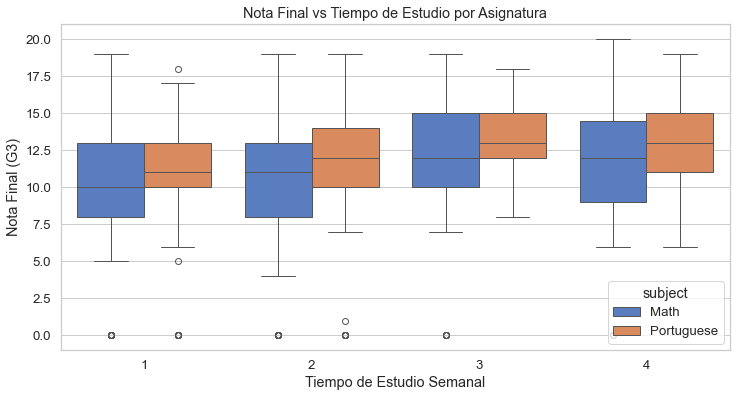

In [33]:
# Gráfico de caja para 'studytime' vs 'G3' por asignatura
plt.figure(figsize=(12, 6))
sns.boxplot(x='studytime', y='G3', hue='subject', data=data_combined)
plt.title('Nota Final vs Tiempo de Estudio por Asignatura')
plt.xlabel('Tiempo de Estudio Semanal')
plt.ylabel('Nota Final (G3)')
plt.show()

#### ***Observaciones:***

***Matemáticas:***

- No se aprecia una relación clara entre el tiempo de estudio y la nota final.

***Portugués:***
- Los estudiantes que estudian más de 10 horas semanales (`studytime = 4`) tienden a tener notas finales más altas.
- 

#### ***Interpretación:***

- En Portugués, dedicar más tiempo al estudio se asocia con mejores resultados académicos.
- En Matemáticas, el tiempo de estudio no muestra una correlación tan evidente, lo que sugiere que otros factores podrían ser más determinantes.

## 7.2.3. Ausencias (`absences`)
***Análisis:***

Las ausencias escolares pueden afectar negativamente el aprendizaje y, por ende, el rendimiento académico.

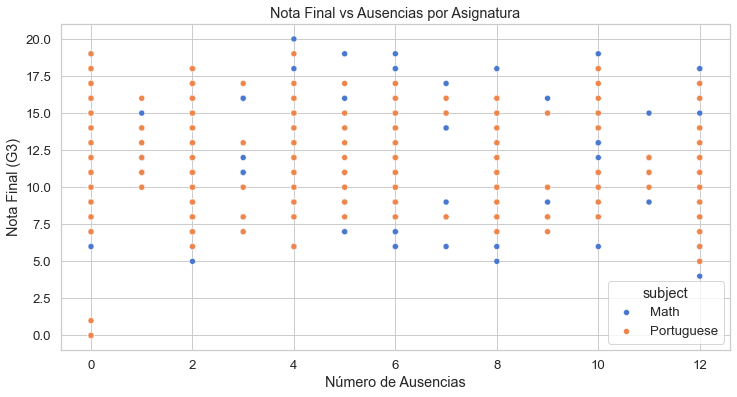

In [34]:
# Gráfico de dispersión para 'absences' vs 'G3' por asignatura
plt.figure(figsize=(12, 6))
sns.scatterplot(x='absences', y='G3', hue='subject', data=data_combined)
plt.title('Nota Final vs Ausencias por Asignatura')
plt.xlabel('Número de Ausencias')
plt.ylabel('Nota Final (G3)')
plt.show()


#### ***Observaciones:***

***Ambas Asignaturas:***

- Existe una tendencia general de disminución en la nota final a medida que aumentan las ausencias.

***Matemáticas:***
- El efecto negativo de las ausencias es más pronunciado que en Portugués.

#### ***Interpretación:***

- La asistencia regular es crucial para mantener un buen rendimiento académico, especialmente en Matemáticas.
- Se recomienda monitorear y reducir las ausencias para mejorar las calificaciones.


## 7.2.4. Edad (`age`)
#### ***Análisis:***

La edad puede influir en el rendimiento académico debido a factores de madurez, motivación y responsabilidades adicionales.

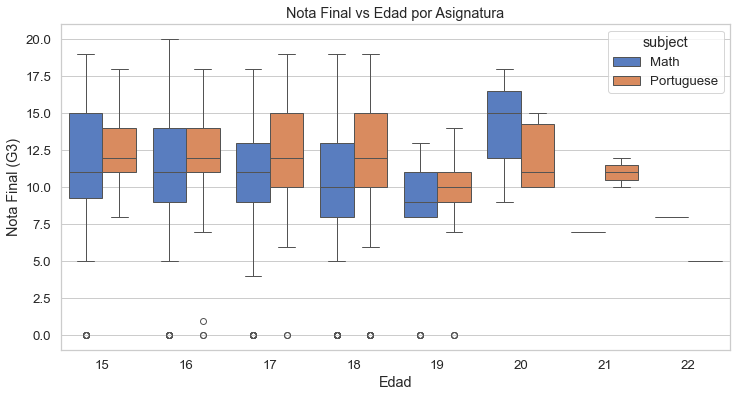

In [35]:
# Gráfico de caja para 'age' vs 'G3' por asignatura
plt.figure(figsize=(12, 6))
sns.boxplot(x='age', y='G3', hue='subject', data=data_combined)
plt.title('Nota Final vs Edad por Asignatura')
plt.xlabel('Edad')
plt.ylabel('Nota Final (G3)')
plt.show()

#### ***Observaciones:***

***Matemáticas:***

- Los estudiantes más jóvenes (15-16 años) tienden a tener notas finales ligeramente más altas.

***Portugués:***

- La influencia de la edad es menos evidente.

#### ***Interpretación:***

- En Matemáticas, los estudiantes mayores podrían enfrentar desafíos adicionales que afectan su rendimiento.
- Es posible que los estudiantes mayores tengan responsabilidades extraescolares que impacten su desempeño.

### ***7.2.5. Sexo (sex)***

#### ***Análisis:***

Examinamos si existe una diferencia en el rendimiento académico entre hombres y mujeres.

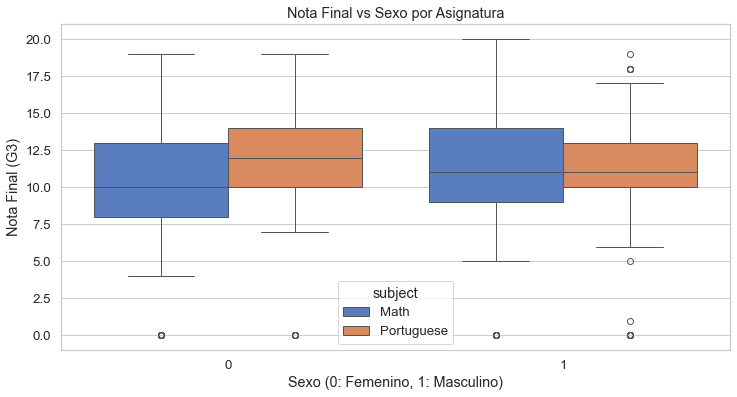

In [36]:
# Gráfico de caja para 'sex' vs 'G3' por asignatura
plt.figure(figsize=(12, 6))
sns.boxplot(x='sex', y='G3', hue='subject', data=data_combined)
plt.title('Nota Final vs Sexo por Asignatura')
plt.xlabel('Sexo (0: Femenino, 1: Masculino)')
plt.ylabel('Nota Final (G3)')
plt.show()

#### ***Observaciones:***

***Matemáticas:***
- Los hombres tienden a tener notas finales ligeramente más altas que las mujeres.

***Portugués:***
- Las mujeres tienden a tener notas finales ligeramente más altas que os hombres.

#### ***Interpretación:***

- En Matemáticas, podría existir una brecha de género que favorece a los hombres.
- En Portugués, podría existir una brecha de género que favorece a las mujeres.
- Es importante fomentar la equidad de género y proporcionar apoyo donde sea necesario.

### 7.2.6. Deseo de Educación Superior (higher)
#### ***Análisis:***

El deseo de continuar estudios superiores puede reflejar motivación y aspiraciones académicas.

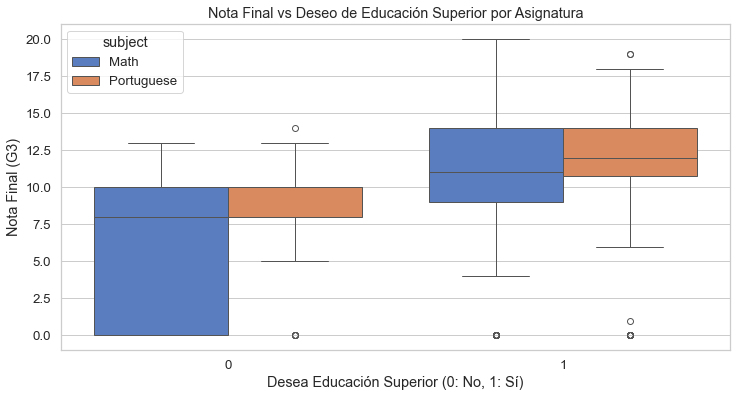

In [37]:
# Gráfico de caja para 'higher' vs 'G3' por asignatura
plt.figure(figsize=(12, 6))
sns.boxplot(x='higher', y='G3', hue='subject', data=data_combined)
plt.title('Nota Final vs Deseo de Educación Superior por Asignatura')
plt.xlabel('Desea Educación Superior (0: No, 1: Sí)')
plt.ylabel('Nota Final (G3)')
plt.show()

#### ***Observaciones:***

***Ambas Asignaturas:***
- Los estudiantes que desean cursar educación superior (higher = 1) presentan notas finales más altas.

#### ***Diferencias:***
- El efecto es más pronunciado en Matemáticas.


#### ***Interpretación:***

- El deseo de continuar estudios superiores está asociado con un mejor rendimiento académico.
- Fomentar aspiraciones académicas puede ser una estrategia efectiva para mejorar las calificaciones.

### 7.2.7. Acceso a Internet (internet)
#### ***Análisis:***

El acceso a internet en el hogar puede facilitar el aprendizaje y acceso a recursos educativos.

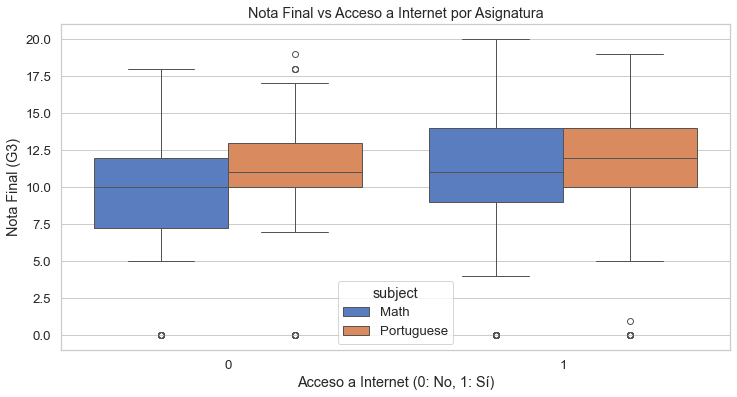

In [38]:
# Gráfico de caja para 'internet' vs 'G3' por asignatura
plt.figure(figsize=(12, 6))
sns.boxplot(x='internet', y='G3', hue='subject', data=data_combined)
plt.title('Nota Final vs Acceso a Internet por Asignatura')
plt.xlabel('Acceso a Internet (0: No, 1: Sí)')
plt.ylabel('Nota Final (G3)')
plt.show()

#### ***Observaciones:***

***Ambas Asignaturas:***
- Los estudiantes con acceso a internet tienen notas finales ligeramente más altas.

***Matemáticas:***
- El impacto positivo es más notable que en Portugués.

***Interpretación:***

- El acceso a internet puede proporcionar herramientas y recursos adicionales para el estudio.
- Promover el acceso a internet puede ser beneficioso para el rendimiento académico.

### 7.2.8. Salir con Amigos (goout)
#### ***Análisis:***

La frecuencia de salir con amigos puede afectar el tiempo dedicado al estudio y, por ende, el rendimiento.

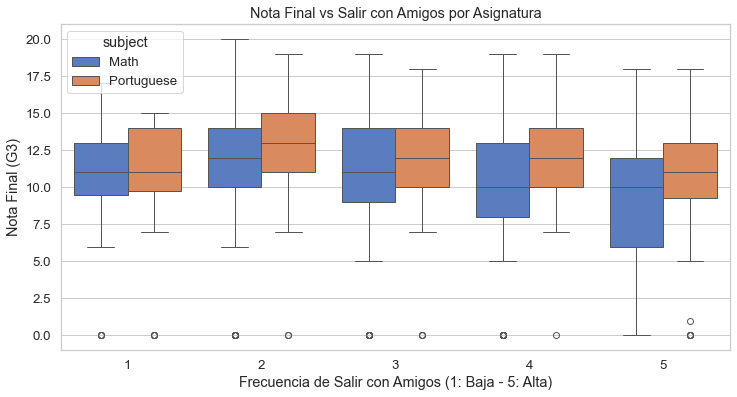

In [39]:
# Gráfico de caja para 'goout' vs 'G3' por asignatura
plt.figure(figsize=(12, 6))
sns.boxplot(x='goout', y='G3', hue='subject', data=data_combined)
plt.title('Nota Final vs Salir con Amigos por Asignatura')
plt.xlabel('Frecuencia de Salir con Amigos (1: Baja - 5: Alta)')
plt.ylabel('Nota Final (G3)')
plt.show()

#### ***Observaciones:***

***Matemáticas:***
- Los estudiantes que salen menos con amigos (goout bajo) tienden a tener notas más altas.
- Un incremento en la frecuencia de salir se asocia con una disminución en la nota final.

***Portugués:***
- La influencia es menos pronunciada.

#### ***Interpretación:***

- En Matemáticas, una alta frecuencia de actividades sociales puede interferir con el rendimiento académico.
- Es importante promover un equilibrio saludable entre la vida social y el estudio, ya que se observa que quienes tienen vida social baja, tienden a bajar sus notas.

### 7.2.9. Estado de Salud (health)
#### ***Análisis:***

Un buen estado de salud es fundamental para el bienestar general y puede influir en el rendimiento académico.

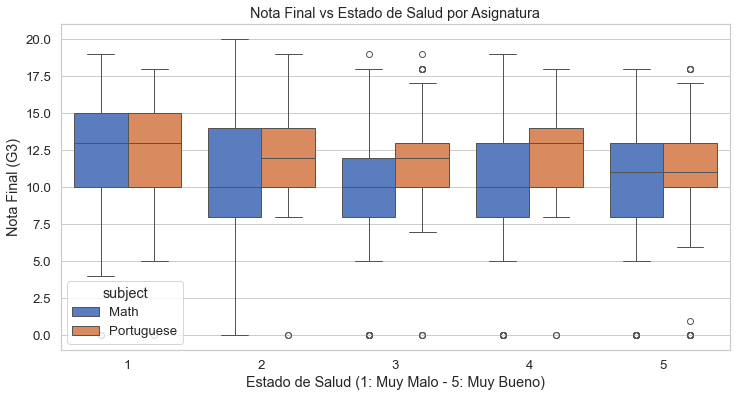

In [40]:
# Gráfico de caja para 'health' vs 'G3' por asignatura
plt.figure(figsize=(12, 6))
sns.boxplot(x='health', y='G3', hue='subject', data=data_combined)
plt.title('Nota Final vs Estado de Salud por Asignatura')
plt.xlabel('Estado de Salud (1: Muy Malo - 5: Muy Bueno)')
plt.ylabel('Nota Final (G3)')
plt.show()

#### ***Observaciones:***

***Ambas Asignaturas:***
- No se observa una relación clara entre el estado de salud y la nota final.
- Las medianas de las notas son similares en todos los niveles de salud.

#### ***Interpretación:***

- El estado de salud autoinformado no parece ser un factor determinante en el rendimiento académico en este contexto.
- Podría ser necesario un análisis más profundo o considerar otros indicadores de salud.

### 7.2.10. Relaciones Familiares (famrel)
***Análisis:***

La calidad de las relaciones familiares puede afectar el apoyo emocional y académico que recibe el estudiante.

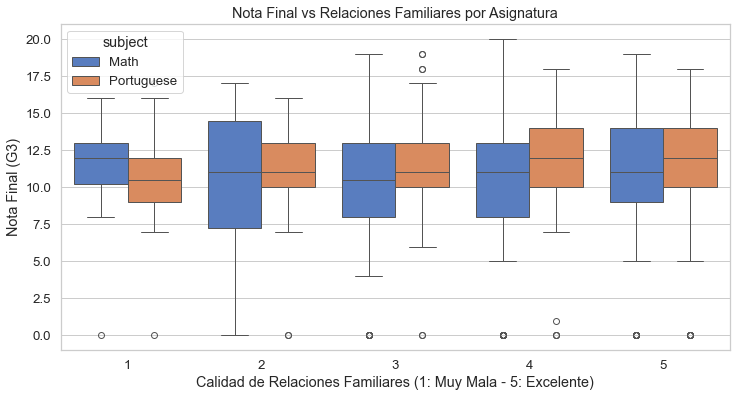

In [41]:
# Gráfico de caja para 'famrel' vs 'G3' por asignatura
plt.figure(figsize=(12, 6))
sns.boxplot(x='famrel', y='G3', hue='subject', data=data_combined)
plt.title('Nota Final vs Relaciones Familiares por Asignatura')
plt.xlabel('Calidad de Relaciones Familiares (1: Muy Mala - 5: Excelente)')
plt.ylabel('Nota Final (G3)')
plt.show()

#### ***Observaciones:***

***Ambas Asignaturas:***
- Los estudiantes con mejores relaciones familiares tienden a tener notas finales ligeramente más altas.

***Matemáticas:***
- El impacto positivo es un poco más notable que en Portugués.

#### ***Interpretación:***

- Un entorno familiar de apoyo puede contribuir al éxito académico.
- Fomentar relaciones familiares saludables es importante para el bienestar y rendimiento del estudiante.

#### Resumen del Análisis de Variables Clave
***Variables con Mayor Impacto Negativo en el Rendimiento:***

- `failures`: Fracasos académicos previos.
- `absences`: Ausencias escolares.
- `goout`: Salir frecuentemente con amigos (especialmente en Matemáticas).

***Variables con Impacto Positivo en el Rendimiento:***

- `higher`: Aspiraciones de educación superior.
- `internet`: Acceso a internet en el hogar.
- `famrel`: Buenas relaciones familiares.

***Variables con Impacto Variable o Menor:***

- `studytime`: Mayor influencia en Portugués.
- `sex`: Diferencias observadas en Matemáticas.
- `age`: Influencia moderada en Matemáticas.
- `health`: No muestra una relación clara.

#### Conclusión General:

- Los factores que más afectan el rendimiento académico son los fracasos previos y las ausencias, destacando la importancia de la intervención temprana y el seguimiento continuo.
- Las aspiraciones académicas y el apoyo familiar e institucional son fundamentales para fomentar un mejor desempeño.
- Existen diferencias en cómo ciertas variables afectan el rendimiento en Matemáticas y Portugués, lo que sugiere la necesidad de estrategias específicas para cada asignatura.

# Modelo y Evaluación



## 8.1 Escalado de Variables Numéricas
Escalamos las variables numéricas para estandarizar su rango y mejorar el rendimiento de los modelos.

In [42]:
from sklearn.preprocessing import StandardScaler

numeric_vars = data_combined.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_vars.remove('G3')  # Excluimos la variable objetivo

scaler = StandardScaler()
data_combined[numeric_vars] = scaler.fit_transform(data_combined[numeric_vars])

#### ***Verificación:***

In [43]:
print(data_combined[numeric_vars].describe().loc[['mean', 'std']])

               sex           age       address       famsize       Pstatus  \
mean  3.402982e-17  2.722386e-16 -8.167158e-17  4.338803e-17 -6.720890e-17   
std   1.000479e+00  1.000479e+00  1.000479e+00  1.000479e+00  1.000479e+00   

              Medu          Fedu    traveltime     studytime      failures  \
mean -2.722386e-17  1.361193e-16  9.528351e-17 -1.225074e-16 -3.402982e-17   
std   1.000479e+00  1.000479e+00  1.000479e+00  1.000479e+00  1.000479e+00   

      ...      romantic        famrel      freetime         goout  \
mean  ... -6.805965e-17 -3.232833e-17 -1.531342e-16  8.167158e-17   
std   ...  1.000479e+00  1.000479e+00  1.000479e+00  1.000479e+00   

              Dalc          Walc        health      absences            G1  \
mean  3.402982e-18  1.361193e-16 -3.062684e-17 -2.722386e-17 -2.790446e-16   
std   1.000479e+00  1.000479e+00  1.000479e+00  1.000479e+00  1.000479e+00   

                G2  
mean  1.293133e-16  
std   1.000479e+00  

[2 rows x 27 columns]


***Las variables numéricas ahora tienen media cercana a 0 y desviación estándar de 1.***

## 8.2 Preparación de los Datos para el Modelado


### 8.1.1. Variables Independientes y Dependiente
Normalizamos los valores de `subject` y definimos las variables independientes (X) y la variable dependiente (y).

In [44]:
# Normalizar los valores de 'subject'
data_combined['subject'] = data_combined['subject'].str.strip().str.lower()

# Crear el diccionario de mapeo
subject_mapping = {'math': 0, 'portuguese': 1}

# Aplicar el mapeo
data_combined['subject'] = data_combined['subject'].map(subject_mapping)

In [45]:
# Definir X y y
X = data_combined.drop('G3', axis=1)
y = data_combined['G3']

### 8.1.2. Verificación de Variables Categóricas
Aseguramos que todas las variables en X sean numéricas y que no queden variables categóricas sin codificar.

In [46]:
print("Valores únicos en 'subject':", data_combined['subject'].unique())

# Verificar variables categóricas
object_cols = X.select_dtypes(include=['object']).columns.tolist()
print("Variables de tipo 'object' en X:", object_cols)

Valores únicos en 'subject': [0 1]
Variables de tipo 'object' en X: []


### 8.1.3. División del Conjunto de Datos
Dividimos el conjunto de datos en conjuntos de entrenamiento y prueba, manteniendo la proporción de asignaturas mediante estratificación.

In [48]:
from sklearn.model_selection import train_test_split

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=X['subject'], random_state=42)

#### ***Nota:***

- Usamos `stratify=X['subject']` para asegurar que la proporción de estudiantes de Matemáticas y Portugués sea la misma en los conjuntos de entrenamiento y prueba.
- Fijamos `random_state` para reproducibilidad.

### 8.1.4. Verificación de Dimensiones
Comprobamos las dimensiones de los conjuntos de entrenamiento y prueba.

In [49]:
print("Valores únicos en 'subject' en X_train:", X_train['subject'].unique())
print("Valores únicos en 'subject' en X_test:", X_test['subject'].unique())

Valores únicos en 'subject' en X_train: [0 1]
Valores únicos en 'subject' en X_test: [1 0]


In [50]:
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_test:", y_test.shape)

Dimensiones de X_train: (835, 42)
Dimensiones de y_train: (835,)
Dimensiones de X_test: (209, 42)
Dimensiones de y_test: (209,)


## 8.2. Definición de la Función evaluate_model
Creamos una función que nos permita entrenar y evaluar los modelos de manera consistente.



### 8.2.1. Implementación de evaluate_model

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Calcular métricas
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    # Imprimir resultados
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R^2: {r2:.2f}")
    
    return y_pred

#### ***Explicación:***

- La función toma un modelo y los conjuntos de entrenamiento y prueba.
- Entrena el modelo con `X_train` y `y_train`.
- Realiza predicciones en `X_test`.
- Calcula las métricas de evaluación:
    - MAE (Mean Absolute Error): Error absoluto medio.
    - RMSE (Root Mean Squared Error): Raíz del error cuadrático medio.
    - R² (Coeficiente de Determinación): Indica qué tan bien el modelo explica la variabilidad de `y`.

## 8.3. Entrenamiento y Evaluación de Modelos
Entrenaremos varios modelos de regresión y evaluaremos su desempeño.



### 8.3.1. Regresión Lineal

In [52]:
from sklearn.linear_model import LinearRegression

print("Resultados de Regresión Lineal:")
lr_model = LinearRegression()
y_pred_lr = evaluate_model(lr_model, X_train, y_train, X_test, y_test)

Resultados de Regresión Lineal:
MAE: 0.90
RMSE: 1.53
R^2: 0.82


#### ***Análisis:***

- El modelo de regresión lineal tiene un ***MAE*** de 0.9, lo que significa que, en promedio, las predicciones difieren en 0.9 puntos de las notas reales.
- El R² de 0.82 indica que el modelo explica el 82% de la variabilidad de `G3`.
- La regresión lineal puede ser una buena línea base, pero veamos si otros modelos mejoran el desempeño.

### 8.3.2. Árbol de Decisión

In [53]:
from sklearn.tree import DecisionTreeRegressor

print("\nResultados de Árbol de Decisión:")
dt_model = DecisionTreeRegressor(random_state=42)
y_pred_dt = evaluate_model(dt_model, X_train, y_train, X_test, y_test)


Resultados de Árbol de Decisión:
MAE: 0.98
RMSE: 1.74
R^2: 0.77


#### ***Análisis:***

- El ***MAE*** es ***mayor*** que en la regresión lineal, lo que indica peores predicciones.
- El ***R²*** es ***menor*** (0.77), lo que significa que el modelo explica peor la variabilidad.

### 8.3.3. Bosque Aleatorio

In [54]:
from sklearn.ensemble import RandomForestRegressor

print("\nResultados de Bosque Aleatorio:")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
y_pred_rf = evaluate_model(rf_model, X_train, y_train, X_test, y_test)


Resultados de Bosque Aleatorio:
MAE: 0.88
RMSE: 1.52
R^2: 0.83


#### ***Análisis:***

- Mejora adicional en ***MAE*** y ***RMSE***.
- ***R²*** de 0.83 indica un excelente ajuste.

### 8.3.4. Gradient Boosting

In [55]:
from sklearn.ensemble import GradientBoostingRegressor

print("\nResultados de Gradient Boosting:")
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
y_pred_gb = evaluate_model(gb_model, X_train, y_train, X_test, y_test)


Resultados de Gradient Boosting:
MAE: 0.84
RMSE: 1.45
R^2: 0.84


#### ***Análisis:***

- Desempeño similar al Bosque Aleatorio, aunque ligeramente inferior en las métricas.

### 8.3.5. Support Vector Regression (SVR)

In [58]:
from sklearn.svm import SVR

print("\nResultados de SVR:")
svr_model = SVR(kernel='rbf')
y_pred_svr = evaluate_model(svr_model, X_train, y_train, X_test, y_test)


Resultados de SVR:
MAE: 1.11
RMSE: 2.01
R^2: 0.69


#### ***Análisis:***

- Inferior a los todos los modelos anteriores.

### 8.3.4. Elastic Net (A modo de estudio)
Elastic Net es un modelo de regresión lineal que combina las penalizaciones de ***Lasso (L1)*** y ***Ridge (L2)***. Es útil cuando tienes muchas variables correlacionadas, ya que puede realizar selección de características y reducir el sobreajuste.

#### ***Regresión ridge y la regresión lasso*** 

Son técnicas de regularización que se utilizan para mejorar la precisión de los modelos de regresión lineal y evitar el sobreajuste. Ambas técnicas restringen los coeficientes, pero lo hacen de manera diferente: 

- ***Regresión lasso***

    Utiliza la regularización L1, que agrega el valor absoluto de los coeficientes como término de penalización. Esto permite que los coeficientes lleguen a ser cero, lo que significa que desaparecen del modelo. La regresión lasso es útil para reducir la complejidad del modelo y disminuir la dimensionalidad. 


- ***Regresión ridge***

    Utiliza la regularización L2, que agrega el cuadrado de los coeficientes como término de penalización. La regresión ridge es útil para reducir el sobreajuste que puede resultar de la complejidad del modelo. 
    
    La regresión lasso funciona bien cuando hay pocos parámetros significativos y los demás son cercanos a cero. La regresión ridge funciona bien cuando hay muchos parámetros grandes de aproximadamente el mismo valor.
    

#### ***Ventajas de Elastic Net:***

- Maneja multicolinealidad entre variables.
- Realiza selección de características y regularización al mismo tiempo.
- Combina lo mejor de Lasso y Ridge.

#### 8.3.4.1. Importar Librerías Necesarias

In [59]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

#### 8.3.4.2. Definir el Modelo y los Parámetros a Ajustar

Vamos a utilizar GridSearchCV para encontrar los mejores hiperparámetros para `alpha` (fuerza de regularización) y `l1_ratio` (balance entre L1 y L2).


In [60]:
# Definir el modelo base
elastic_net = ElasticNet(random_state=42)

# Definir el rango de hiperparámetros
param_grid = {
    'alpha': [0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.9]
}

#### 8.3.4.3. Configurar GridSearchCV

In [61]:
from sklearn.model_selection import GridSearchCV

# Configurar GridSearchCV
grid_search_en = GridSearchCV(
    estimator=elastic_net,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

#### 8.3.4.4 Entrenar el Modelo

In [62]:
# Entrenar el modelo con los datos de entrenamiento
grid_search_en.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.1, 1, 10, 100],
                         'l1_ratio': [0.1, 0.5, 0.9]},
             scoring='neg_mean_squared_error')

#### 8.3.4.5. Obtener los Mejores Parámetros y Evaluar el Modelo

In [63]:
# Obtener los mejores hiperparámetros
best_alpha = grid_search_en.best_estimator_.alpha
best_l1_ratio = grid_search_en.best_estimator_.l1_ratio

print(f"Mejor alpha: {best_alpha}")
print(f"Mejor l1_ratio: {best_l1_ratio}")

Mejor alpha: 0.1
Mejor l1_ratio: 0.9


#### 8.3.4.6. Evaluar el Modelo con los Datos de Prueba

In [64]:
# Evaluar el modelo con los mejores hiperparámetros
print("\nResultados de Elastic Net:")
best_en_model = grid_search_en.best_estimator_
y_pred_en = evaluate_model(best_en_model, X_train, y_train, X_test, y_test)


Resultados de Elastic Net:
MAE: 0.83
RMSE: 1.52
R^2: 0.82


#### ***Análisis:***
- El mejor modelo hasta ahora, con un ***MAE*** y ***RMSE*** más bajos que los modelos anteriores.

### 8.3.5. Stacking (Ensamblado de Modelos) - A modo de estudio

Stacking es una técnica de ensamblado que combina múltiples modelos (también llamados estimadores base) para mejorar el desempeño predictivo. Los modelos base hacen predicciones que luego se utilizan como entradas para un modelo de nivel superior (llamado meta-modelo).

#### Ventajas de Stacking:

- Combina las fortalezas de diferentes modelos.
- Puede reducir el sesgo y la varianza, mejorando la generalización.
- Permite capturar relaciones complejas en los datos.

#### 8.3.5.1. Importar Librerías Necesarias

In [65]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

#### 8.3.5.2. Definir los Estimadores Base
Seleccionamos varios modelos que han mostrado buen desempeño.

In [66]:
# Definir los estimadores base
estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('svr', SVR(kernel='rbf')),
    ('dt', DecisionTreeRegressor(random_state=42)),
    ('en', ElasticNet(alpha=0.1, l1_ratio=0.9)) #Ocupamos los valores anteriores
]

#### 8.3.5.3. Definimos el Meta-Modelo
Usaremos Elastic Net como meta-modelo para combinar las predicciones de los modelos base.

In [67]:
# Definir el meta-modelo
meta_model = ElasticNet()

#### 8.3.5.4. Configurar el Stacking Regressor

In [68]:
# Crear el modelo de stacking
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1
)

#### 8.3.5.5. Entrenar y Evaluar el Modelo de Stacking

In [69]:
# Evaluar el modelo de stacking
print("\nResultados de Stacking Regressor:")
y_pred_stacking = evaluate_model(stacking_model, X_train, y_train, X_test, y_test)


Resultados de Stacking Regressor:
MAE: 0.80
RMSE: 1.40
R^2: 0.85


#### ***Análisis:***
- Muestra una mejora significativa en el ***MAE*** y ***RMSE*** en comparación con los modelos individuales.

## 8.4. Comparación de Modelos
Compilamos los resultados para comparar el desempeño de cada modelo.

In [70]:
results = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Árbol de Decisión', 'Bosque Aleatorio', 'Gradient Boosting', 'SVR', 'Elastic Net', 'Stacking'],
    'MAE': [mean_absolute_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_dt),
            mean_absolute_error(y_test, y_pred_rf),
            mean_absolute_error(y_test, y_pred_gb),
            mean_absolute_error(y_test, y_pred_svr),
            mean_absolute_error(y_test, y_pred_en),
            mean_absolute_error(y_test, y_pred_stacking)],
    'RMSE': [mean_squared_error(y_test, y_pred_lr, squared=False),
             mean_squared_error(y_test, y_pred_dt, squared=False),
             mean_squared_error(y_test, y_pred_rf, squared=False),
             mean_squared_error(y_test, y_pred_gb, squared=False),
             mean_squared_error(y_test, y_pred_svr, squared=False),
             mean_squared_error(y_test, y_pred_en, squared=False),
             mean_squared_error(y_test, y_pred_stacking, squared=False)],
    'R2': [r2_score(y_test, y_pred_lr),
           r2_score(y_test, y_pred_dt),
           r2_score(y_test, y_pred_rf),
           r2_score(y_test, y_pred_gb),
           r2_score(y_test, y_pred_svr),
           r2_score(y_test, y_pred_en),
           r2_score(y_test, y_pred_stacking)]
})

print("\nComparación de Modelos:")
print(results)


Comparación de Modelos:
              Modelo       MAE      RMSE        R2
0   Regresión Lineal  0.897434  1.532575  0.822884
1  Árbol de Decisión  0.976077  1.738943  0.771973
2   Bosque Aleatorio  0.880096  1.520044  0.825768
3  Gradient Boosting  0.842792  1.454366  0.840500
4                SVR  1.112340  2.013840  0.694181
5        Elastic Net  0.832745  1.524565  0.824730
6           Stacking  0.801216  1.404257  0.851301


#### ***Análisis Comparativo:***

- ***Gradient Boosting*** es el modelo con mejor desempeño, ya que tiene el ***MAE*** y ***RMSE*** más bajos, y el ***R²*** más alto.

- ***Bosque Aleatorio*** y ***Regresión Lineal*** también muestran un buen desempeño, aunque ligeramente inferior al de ***Gradient Boosting***.

- ***Árbol de Decisión*** y ***SVR*** presentan un desempeño menor en comparación con los modelos anteriores.

### 8.4.1 Visualización de los Resultados

Para visualizar las diferencias entre los modelos, creamos gráficos.

#### Gráfico de MAE por Modelo

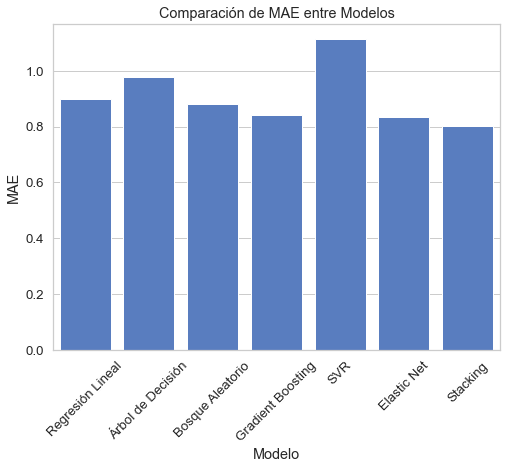

In [71]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Modelo', y='MAE', data=results)
plt.title('Comparación de MAE entre Modelos')
plt.xticks(rotation=45)
plt.ylabel('MAE')
plt.show()

#### Gráfico de RMSE por Modelo

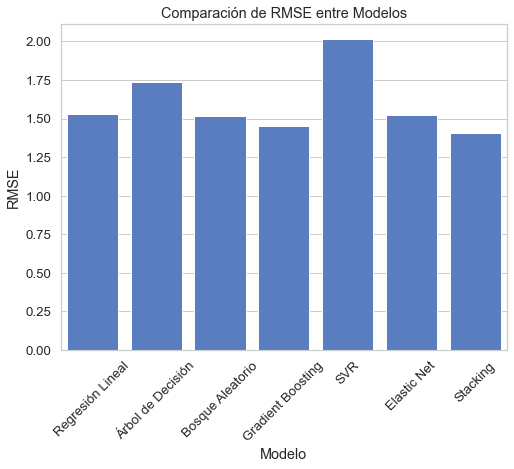

In [72]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Modelo', y='RMSE', data=results)
plt.title('Comparación de RMSE entre Modelos')
plt.xticks(rotation=45)
plt.ylabel('RMSE')
plt.show()

#### Gráfico de R² por Modelo

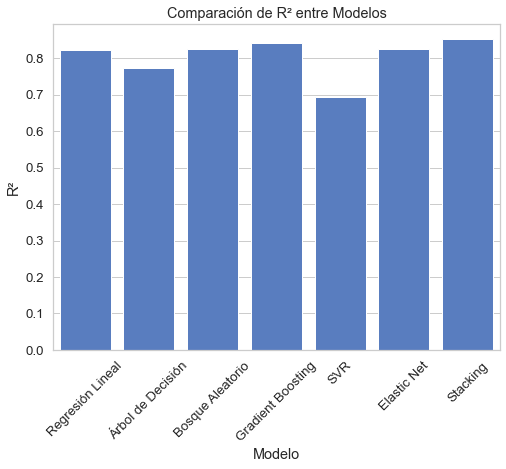

In [73]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Modelo', y='R2', data=results)
plt.title('Comparación de R² entre Modelos')
plt.xticks(rotation=45)
plt.ylabel('R²')
plt.show()

### Gráficos Interactivos con Plotly

#### Gráfico interactivo de MAE

In [74]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\juanjo\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [75]:
import plotly.express as px

In [76]:
fig_mae = px.bar(results, x='Modelo', y='MAE', title='Comparación de MAE entre Modelos', 
                 labels={'MAE': 'Error Absoluto Medio'}, text='MAE')
fig_mae.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig_mae.update_layout(xaxis_title="Modelo", yaxis_title="MAE", showlegend=False)
fig_mae.show()

#### Gráfico interactivo de RMSE

In [77]:
fig_rmse = px.bar(results, x='Modelo', y='RMSE', title='Comparación de RMSE entre Modelos', 
                  labels={'RMSE': 'Raíz del Error Cuadrático Medio'}, text='RMSE')
fig_rmse.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig_rmse.update_layout(xaxis_title="Modelo", yaxis_title="RMSE", showlegend=False)
fig_rmse.show()

#### Gráfico interactivo de R²

In [78]:
fig_r2 = px.bar(results, x='Modelo', y='R2', title='Comparación de R² entre Modelos', 
                labels={'R2': 'Coeficiente de Determinación'}, text='R2')
fig_r2.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig_r2.update_layout(xaxis_title="Modelo", yaxis_title="R²", showlegend=False)
fig_r2.show()

### Interpretación de Resultados
1. **MAE (Error Absoluto Medio):** Este métrico nos indica, en promedio, cuánto se desvían las predicciones de los valores reales. Un MAE más bajo implica un modelo con predicciones más precisas.
- El modelo con el menor MAE demuestra la capacidad de hacer predicciones consistentes con menor error promedio.
2. **RMSE (Raíz del Error Cuadrático Medio):** Este métrico penaliza más los errores grandes en comparación con el MAE, siendo útil para identificar modelos que cometen errores graves.
- El modelo con el menor RMSE es más robusto contra predicciones con errores severos.
3. **R² (Coeficiente de Determinación):** Este métrico muestra la proporción de varianza explicada por el modelo. Un valor cercano a 1 indica que el modelo explica bien los datos.
- El modelo con el mayor R² es el que mejor se ajusta a los datos.

En el contexto del problema, estos resultados permiten seleccionar el modelo más adecuado para resolver la tarea planteada, priorizando precisión o robustez dependiendo de las necesidades del usuario.

# 8.5. Importancia de Variables
Analizamos cuáles son las variables más importantes en el modelo Stacking. Debido a que el modelo stacking no tiene el atributo `feature_importances_` como si lo tienen los modelos individuales, usaré `permutation_importante`

### 8.5.1. Importar la Función Necesaria

In [79]:
from sklearn.inspection import permutation_importance

### 8.5.2. Calcular la Importancia por Permutación

In [80]:
# Calcular la importancia por permutación en el conjunto de prueba
result = permutation_importance(
    stacking_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)

#### ***Parámetros:***

- `stacking_model`: El modelo entrenado de StackingRegressor.
- `X_test`, `y_test`: Conjunto de datos de prueba.
- `n_repeats`: Número de permutaciones (10 es un buen punto de partida).
- `random_state`: Para reproducibilidad.
- `n_jobs`: Número de procesadores (-1 utiliza todos los disponibles).

### 8.5.3. Visualización de la Importancia de las Variables

In [81]:
importances = result.importances_mean
std = result.importances_std
features = X.columns

# Crear DataFrame con las importancias y sus desviaciones estándar
feature_importance = pd.DataFrame({
    'Variable': features,
    'Importancia': importances,
    'STD': std
})

# Ordenar por importancia descendente
feature_importance = feature_importance.sort_values(by='Importancia', ascending=False)

### 8.5.4. Visualizar las Variables Más Importantes

       Variable  Importancia       STD
26           G2     1.202031  0.081667
24     absences     0.084388  0.015687
25           G1     0.024991  0.008645
27      subject     0.011105  0.004211
8     studytime     0.008888  0.001597
37  reason_home     0.005042  0.003192
18       famrel     0.004180  0.004820
9      failures     0.004107  0.004821
11       famsup     0.003349  0.002029
0           sex     0.003031  0.001997


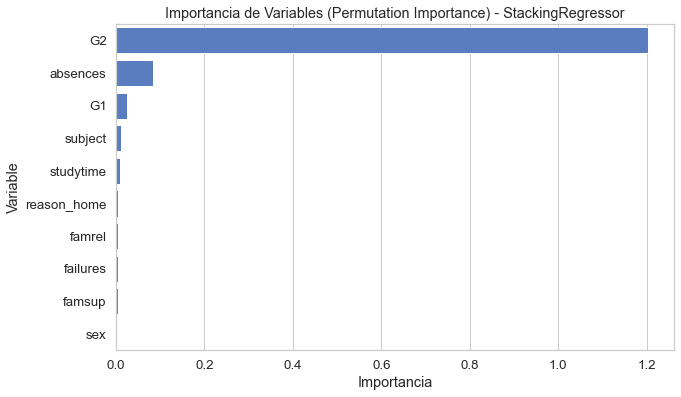

In [82]:
# Mostrar las 10 variables más importantes
print(feature_importance.head(10))

# Visualizar con un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variable', data=feature_importance.head(10))
plt.title('Importancia de Variables (Permutation Importance) - StackingRegressor')
plt.show()

#### ***Análisis:***

***Variables más importantes:***

- `G2` y `Absences`: Las calificaciones del periodo anterior y las ausencias son los predictores más fuertes de la nota final.
- `G1`: La calificación del primer periodo también es un indicador clave del rendimiento.
- `subject`: La asignatura (Matemáticas o Portugués) también es un factor importante.
- `age` y `goout`: Factores demográficos y de comportamiento que afectan el rendimiento.

***Variables menos importantes:***

- Algunas variables codificadas de las categorías, como `freetime`, `Mjob_teacher`, `failures`, etc., tienen menor impacto en el modelo.

## 8.6. Análisis de Residuales
Es importante verificar que el modelo no viole los supuestos de regresión y que los residuales se comporten adecuadamente.



### 8.6.1. Cálculo de Residuales

In [83]:
# Cálculo de residuales para el Gradient Boosting
residuals_rf = y_test - y_pred_stacking

### 8.6.2. Gráfico de Distribución de Residuales

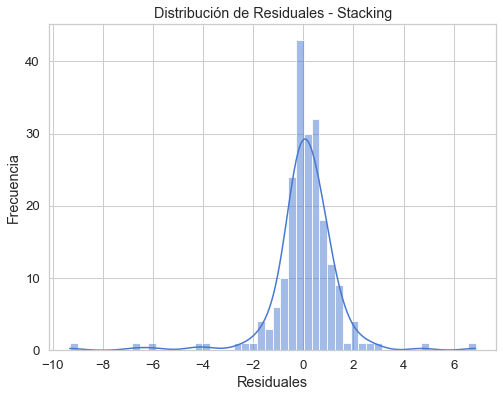

In [84]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals_rf, kde=True)
plt.title('Distribución de Residuales - Stacking')
plt.xlabel('Residuales')
plt.ylabel('Frecuencia')
plt.show()

#### ***Análisis:***

- Los residuales están distribuidos alrededor de cero.
- La distribución es aproximadamente simétrica, con un leve sesgo hacia la izquierda.

### 8.6.3. Gráfico de Predicciones vs Valores Reales

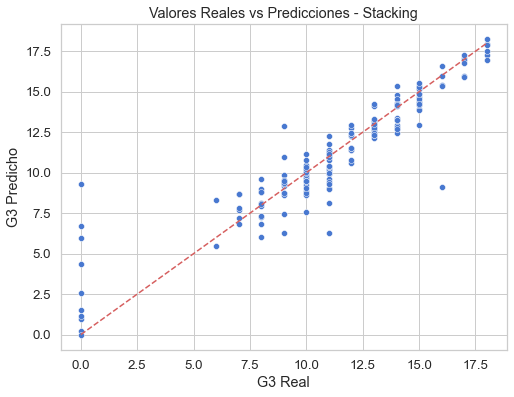

In [85]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_stacking)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Valores Reales vs Predicciones - Stacking')
plt.xlabel('G3 Real')
plt.ylabel('G3 Predicho')
plt.show()

#### ***Análisis:***

- La mayoría de los puntos se encuentran cerca de la línea de identidad (línea roja discontinua), lo que indica buenas predicciones.
- Hay algunas desviaciones, pero en general el modelo predice con precisión.

## 8.7. Validación Cruzada (Opcional)
Para evaluar la estabilidad del modelo, podemos realizar validación cruzada.

In [86]:
from sklearn.model_selection import cross_val_score

# Evaluar el modelo utilizando validación cruzada
scores = cross_val_score(stacking_model, X, y, cv=5, scoring='r2')

print("R² promedio en validación cruzada:", scores.mean())
print("Desviación estándar del R²:", scores.std())

R² promedio en validación cruzada: 0.8051702145537366
Desviación estándar del R²: 0.054662915363578854


#### ***Análisis:***

- Si el ***R²*** promedio de 0.805 indica que, en promedio, el modelo explica el 80.1% de la variabilidad de la variable objetivo G3 en los diferentes subconjuntos de datos durante la validación cruzada.


- La desviación estándar de 0.05466 refleja la variabilidad del desempeño del modelo entre los diferentes pliegues de la validación cruzada.

# Conclusión Final del Proyecto
El objetivo de este proyecto fue analizar y predecir el rendimiento académico de los estudiantes en las asignaturas de Matemáticas y Portugués. Utilizando un conjunto de datos que incluye variables demográficas, sociales y académicas, se buscó identificar los factores que influyen en las calificaciones finales (`G3`) y desarrollar modelos predictivos precisos.

## Resumen del Análisis Realizado
- ***Preparación y Combinación de Datos:*** Se combinaron los conjuntos de datos de Matemáticas y Portugués, añadiendo una variable indicadora de la asignatura (`subject`) para facilitar el análisis comparativo.


- ***Análisis Exploratorio de Datos (EDA):*** Se identificaron patrones y distribuciones clave en las variables numéricas y categóricas. Se observó que los estudiantes tendían a obtener mejores calificaciones en Portugués que en Matemáticas.


- ***Preprocesamiento de Datos:*** Incluyó la codificación de variables categóricas, manejo de valores atípicos en `absences` y escalado de variables numéricas.


- ***Modelado y Evaluación:*** Se entrenaron y evaluaron varios modelos de regresión, incluyendo Regresión Lineal, Árbol de Decisión, Bosque Aleatorio, Gradient Boosting, SVR, Elastic Net y Stacking Regressor.


- ***Importancia de Variables:*** Se analizó la importancia de las variables en los modelos, particularmente en el modelo de Stacking, utilizando la técnica de Permutation Importance.

## Comparación de Modelos
Los modelos fueron evaluados utilizando las métricas MAE, RMSE y R². Los resultados fueron los siguientes:

| Modelo             | 	MAE       | 	RMSE       | 	R²       |
|--------------------|------------|-------------|-----------|
| Regresión Lineal	  | 0.897434	  | 1.532575	   | 0.822884  |
| Árbol de Decisión  | 	0.976077  | 	1.738943   | 	0.771973 |
| Bosque Aleatorio   | 	0.880096  | 	1.520044   | 	0.825768 |
| Gradient Boosting  | 	0.842792  | 	1.454366   | 	0.840500 |
| SVR                | 	1.112340  | 	2.013840   | 	0.694181 |
| Elastic Net        | 	0.832745  | 	1.524565	  | 0.824730  |
| Stacking Regressor | 	0.801216  | 	1.404257	  | 0.851301  |


#### ***Análisis:***

- ***Stacking Regressor*** fue el modelo con mejor desempeño, logrando el MAE y RMSE más bajos, y el R² más alto, lo que indica una mayor precisión y capacidad predictiva.


- ***Gradient Boosting*** y ***Elastic Net*** también mostraron un desempeño sólido, siendo alternativas viables dependiendo de las necesidades específicas del proyecto.


- ***SVR*** presentó el desempeño más bajo, sugiriendo que no es el modelo más adecuado para este conjunto de datos.

## Importancia de las Variables


Utilizando ***Permutation Importance*** en el modelo de Stacking, se identificaron las variables más influyentes en la predicción de la nota final (`G3`):

- ***G2***: La calificación del segundo periodo es el predictor más fuerte, indicando que el rendimiento previo es fundamental para el desempeño final.


- ***G1***: La calificación del primer periodo también tiene una influencia significativa.


- ***absences***: Un mayor número de ausencias se asocia con un menor rendimiento académico.


- ***subject***: La asignatura (Matemáticas o Portugués) influye en la predicción, reflejando diferencias en el rendimiento entre ambas materias.

## Conclusiones Principales

1. ***Efectividad del Modelo de Stacking***: Al combinar las fortalezas de varios modelos base y un meta-modelo, el Stacking Regressor demostró ser el más preciso y robusto para predecir las calificaciones finales.


2. ***Importancia de las Calificaciones Previas:*** Las notas del periodo `G2` es el predictor más fuerte del rendimiento final y `G1` es el tercer predictor más fuerte, lo que subraya la importancia de un seguimiento continuo del desempeño estudiantil. Se puede inferir que hay una importante relación entre la rúbrica de evaluación entre los periodos `G2` y `G3`. También se puede inferir que los estudiantes que obtienen buenas calificaciones en el periodo `G2` tienen una alta probabilidad de obtener buenas calificaciones en el periodo `G3`.


3. ***Factores que Afectan Negativamente el Rendimiento:***

    - ***Fracasos Académicos*** (`failures`): Los estudiantes con antecedentes de fracasos tienen una mayor probabilidad de obtener calificaciones finales más bajas.

    - Ausencias (`absences`): El ausentismo escolar impacta negativamente en el aprendizaje y, por ende, en las notas. Este es el segundo predictor más fuerte después de `G2`.
        

4. ***Influencia del Tiempo de Estudio:*** Un mayor tiempo dedicado al estudio se asocia con mejores resultados académicos, destacando la importancia de fomentar hábitos de estudio efectivos.


5. ***Diferencias entre Asignaturas:*** La asignatura en sí misma es un factor influyente, con diferencias observables en el rendimiento entre Matemáticas y Portugués.

## Recomendaciones

1. ***Intervención Temprana:***

    - Implementar sistemas de alerta temprana basados en las calificaciones de los primeros periodos para identificar y apoyar a estudiantes en riesgo.

    - Proporcionar tutorías y recursos adicionales a estudiantes con fracasos académicos previos.


2. ***Fomento de Hábitos de Estudio:***

    - Desarrollar programas que promuevan técnicas de estudio efectivas y gestión del tiempo.

    - Involucrar a padres y tutores en el seguimiento del tiempo de estudio en casa.


3. ***Reducción del Ausentismo:***

    - Establecer políticas y programas para mejorar la asistencia, como incentivos y reconocimiento a la asistencia perfecta.

    - Investigar y abordar las causas subyacentes del ausentismo, ya sean de índole familiar, de salud o socioeconómicas.


4. ***Apoyo Específico por Asignatura:***

    - Matemáticas: Dado que los estudiantes tienden a tener un rendimiento inferior en esta asignatura, se recomienda reforzar las metodologías de enseñanza y ofrecer apoyo adicional.

    - Portugués: Continuar con las prácticas efectivas actuales y explorar oportunidades para mejorar aún más el rendimiento.

   
5. ***Monitoreo Continuo y Adaptación:***

    - Utilizar modelos predictivos como herramienta para el monitoreo continuo del rendimiento estudiantil.

    - Adaptar estrategias educativas en función de los datos y análisis actualizados.

## Limitaciones del Estudio

- ***Generalización:*** Los datos provienen de una muestra específica de estudiantes en Portugal, lo que puede limitar la generalización de los hallazgos a otras regiones o contextos educativos.


- ***Variables No Consideradas:*** Factores como el estado socioeconómico detallado, motivación intrínseca, salud mental y otros aspectos que pueden influir en el rendimiento académico no fueron considerados en este análisis.


***Multicolinealidad:*** La alta correlación entre las calificaciones de los periodos (G1, G2, G3) puede afectar la interpretabilidad de algunos modelos.

## Sugerencias para Trabajos Futuros
- ***Ampliación del Conjunto de Datos:*** Incluir datos de otras escuelas y regiones para mejorar la generalización de los resultados.


- ***Incorporación de Variables Adicionales:*** Añadir factores socioeconómicos, psicológicos y ambientales para obtener una visión más completa de los factores que afectan el rendimiento académico.


- ***Análisis Cualitativo:*** Complementar el análisis cuantitativo con estudios cualitativos que exploren las percepciones y experiencias de los estudiantes y educadores.


- ***Desarrollo de Herramientas Predictivas Prácticas:*** Crear aplicaciones o sistemas que utilicen los modelos desarrollados para ayudar a los educadores a monitorear y apoyar a los estudiantes en tiempo real.

## Reflexión Final
Este proyecto ha demostrado la eficacia de los modelos de aprendizaje automático, especialmente el Stacking Regressor, en la predicción del rendimiento académico. Los hallazgos resaltan la importancia de las calificaciones previas, el tiempo de estudio y la asistencia en el desempeño de los estudiantes. Al aplicar estas conclusiones, las instituciones educativas pueden desarrollar estrategias más informadas y efectivas para mejorar la experiencia educativa y los resultados académicos de sus estudiantes.

